# 6-13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

---

이번 EXPLORATION은  
[cosmic4dev](https://github.com/cosmic4dev), [
Chang Geun Park](https://github.com/LilPark), [hyyoo3526](https://github.com/hyyoo3526) 셋이서 진행하는 프로젝트입니다👨🏼‍💻👨🏻‍💻👩‍💻

---

### 참가 대회

[캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

### Competition background

집의 가격은 주거 공간의 면적, 위치, 경관, 건물의 연식 등 여러 가지 복잡한 요인의 조합에 의해 결정됩니다.  
이번에 분석하실 데이터는 20개의 변수를 가지고 있으며, **어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것**을 목표로 합니다.  
이번 대회는 리더보드 점수뿐만 아니라 캐글의 공유 정신의 기본인 커널 작성을 장려하는 목표를 가지고 있습니다.

### Data fields

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 집의 가격(Target variable)
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트(면적)
7. sqft_lot : 부지의 평방 피트(면적)
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트(면적)
14. sqft_basement : 지하실의 평방 피트(면적)
15. yr_built : 지어진 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

우리가 예측해야 하는 컬럼은 **price(집의 가격)**이다.

### baseline

[baseline](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)을 활용해보기

---

In [1]:
# 필요한 모듈 불러오기

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
# 데이터 불러오기

data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [3]:
# 데이터 확인해보기

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

- train 데이터 일부를 확인해 봤을 때, id는 집을 구분하는 번호로 인덱스와 같이 정보를 가지고 있지 않다.
- date는 20141013T000000 형식으로 연/월 데이터만 사용하기 위해 T이후 부분은 불필요하다.
- price는 우리가 예측해야하는 타겟 데이터이다.
- 각 데이터의 세부 정보는 상단 [Data fields](#Data-fields)를 통해 확인 할 수 있다.

<AxesSubplot:xlabel='price', ylabel='Density'>

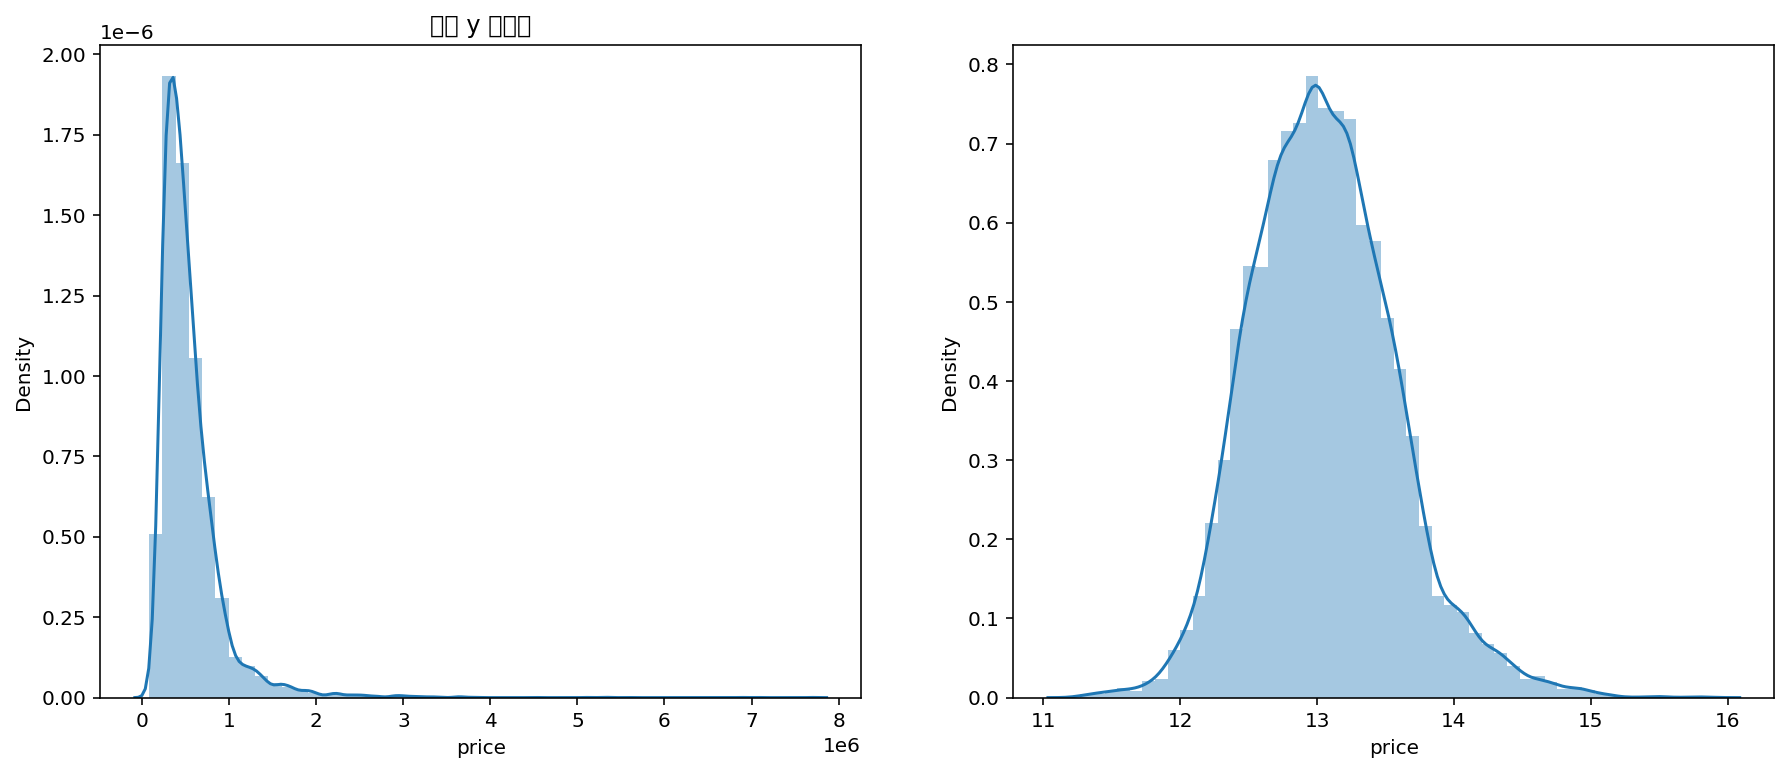

In [5]:
# price의 분포 확인 및 변경

y = train['price']
y_log_transformation = np.log1p(y)

f, ax = plt.subplots(figsize = (15, 6))
plt.subplot(121)
sns.distplot(y)
plt.title('기존 y 데이터')
plt.subplot(122)
sns.distplot(y_log_transformation)

- 치우친 분포를 가지는 컬럼의 경우 모델이 결과를 예측하는 데에 좋지 않은 영향을 미치므로, **로그 변환(log-scaling)**을 통해 데이터 분포를 정규분포에 가깝게 만든다.
- 이후 나오는 코드들에서는 로그 함수로 변환 된 값을 원래 값으로 변환시키는 expm1()을 활용한다.

In [6]:
# 불필요한 Column 변경

train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

y = train['price']
del train['price']
y = np.log1p(y) # price의 분포 변경

del train['id']
del test['id']

---

In [7]:
# 모델 선정

random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

- 사용할 모델들을 변수에 저장해보았다.

In [8]:
# 대회 평가 척도인 RMSE를 계산하는 함수

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [9]:
# 모델별 RMSE을 구하는 함수

def get_scores(models, train, y):
    df = {}
    
    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__
        # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다.
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        # 모델 학습
        model.fit(X_train, y_train)
        # 예측
        y_pred = model.predict(X_test)
        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred)
        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


- 결과값을 보면 XGBRegressor, LGBMRegressor, RandomForestRegressor, GradientBoostingRegressor 순으로 좋은 값을 내고 있다.
- 이 중 110000 수준인 XGBRegressor, LGBMRegressor만 활용하기로 하였다.

In [10]:
# GridSearch를 통해 최적의 하이퍼파라미터를 찾는 함수

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [11]:
param_grid = {
    'n_estimators': [450, 500, 550, 600, 650, 700],
    'max_depth': [11, 13, 15, 17, 19],
    'num_leaves': [15, 31],
    'learning_rate': [0.01, 0.03, 0.05]
}
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   13.2s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done 900 out of 900 | elapsed:  5.4min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
143,0.05,13,700,31,-0.025891,0.160908
141,0.05,13,650,31,-0.025917,0.160987
153,0.05,15,650,31,-0.025924,0.161010
155,0.05,15,700,31,-0.025925,0.161013
139,0.05,13,600,31,-0.025928,0.161022
...,...,...,...,...,...,...
0,0.01,11,450,15,-0.033015,0.181700
12,0.01,13,450,15,-0.033025,0.181729
48,0.01,19,450,15,-0.033029,0.181738
36,0.01,17,450,15,-0.033029,0.181738


- LGBMRegressor의 경우 learning_rate=0.05, max_depth=13, n_estimators=700, num_leaves=31에서 좋은 성능을 보였다
- 아래 해당 하이퍼파라미터를 이용하여 모델 학습을 진행한다.

In [12]:
# LGBMRegressor 모델 학습

model = LGBMRegressor(learning_rate=0.05, max_depth=13, n_estimators=700, num_leaves=31, random_state=random_state)
model.fit(train, y)

LGBMRegressor(learning_rate=0.05, max_depth=13, n_estimators=700,
              random_state=2020)

In [13]:
# 모델 예측 및 값 재변환

prediction_lgbm = model.predict(test)
prediction_lgbm = np.expm1(prediction_lgbm)
prediction_lgbm

array([ 493951.43914791,  456788.72902001, 1354182.6174898 , ...,
        478907.14766353,  317144.7715777 ,  443186.81342628])

---

- XGBRegressor 또한 적절한 하이퍼파라미터를 통해 학습과 예측을 진행한다.

In [18]:
# XGBRegressor 모델 학습


# eta = learning rate, num_boost_around = n_estimators
model_xgb = XGBRegressor(learning_rate=0.02, max_depth=6, n_estimators=5000, random_state=random_state)
model_xgb.fit(train, y)

prediction_xgb = model_xgb.predict(test)
prediction_xgb

array([13.217484, 13.044293, 14.168218, ..., 13.10827 , 12.696807,
       13.019218], dtype=float32)

In [19]:
# 예측값 재변환


prediction_xgb = np.expm1(prediction_xgb)
prediction_xgb

array([ 549895.  ,  462448.84, 1422913.2 , ...,  493001.6 ,  326702.03,
        450997.12], dtype=float32)

---

In [20]:
# Average Blending 구현

prediction_ensemble = np.vstack([prediction_lgbm, prediction_xgb]).mean(0)

- LGBMRegressor, XGBRegressor의 예측값 배열을 vstack()을 활용해서 합쳐준다.
- 위의 합산한 값의 mean()으로 평균값을 구한다.

In [21]:
# 제출 데이터 샘플 확인

data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [22]:
# 제출 데이터 저장

submission['price'] = prediction_ensemble
submission.head()

,id,price
0,15035,5.219232e+05
1,15036,4.596188e+05
2,15037,1.388548e+06
3,15038,2.998234e+05
4,15039,3.295730e+05


In [23]:
# 제출 파일 저장

submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'ensemble2', 'lgbm_xgb')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_ensemble2_RMSLE_lgbm_xgb.csv


---

## 최종 스코어 
Private Score: 109681.61169

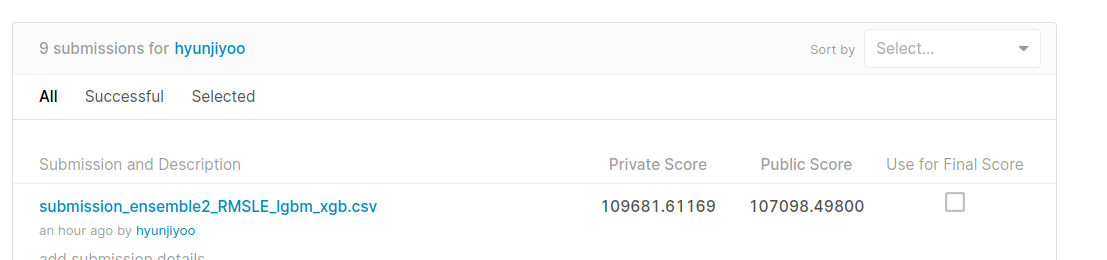

---

## 루브릭


**1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?**

- 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 제출을 진행하였다.  

**2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?**

- 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.  

**3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?**

- 2번 과정을 통해 캐글 Private score가 110000 이하인 109681.61169 점수를 얻었다.  

---

## 협업 과정

\# 가독성을 위해 구어체로 작성되었다.

#### Day1
창근- 우리는 어떻게 하는 게 좋을까?  
현지 - 다른 조들은 다같이 코드작성 후 따로 회고 쓴다고 하던데...  
창근 -그것도 좋지만 회고도 개인적으로 적는 것 보다, 같이 상의하고 설명한 내용을 정리해서 적는 건 어때? 그 안에서 개인적으로 느낌이나 어려웠던 부분들은 개별적으로 적고, 함께 정리해서 추가하는 식으로 하면 될 것 같아!  

창근- 일단 전체적인 프로세스나 코드들을 어느정도는 이해할 필요가 있어  
창근- 지금 노드안에 있는 내용 말고도 캐글대회에 올라온 코드들을 분석하고 정리하는 건 어떨까?   
현지 - 좋아 구글링해도 여러 자료들이 있어 좋은 부분만 참고하여 필요한 부분을 활용해보자  

현지 - 평가기준에 대해 생각해봤는데, 루브릭을 보면 2번 시각화랑 학습에 대한 설명과 우리가 협업을 얼마나 잘했는지가 좋은 평가를 받는데 도움이 될 것 같아  

창근- 지난번 작사가 EXPLORATION [승환님이 올린 걸](https://github.com/RobotPoly/exploration/tree/main/%5BE-4%5DCreate_a_lyricist) 보니 그래프로 시각화한거 좋았었어  
현지 - 좋아 우리도 넣어보자  

경원- 그럼 프로젝트를 진행하면서 의견 나누는 거야?   
창근- 우선 기본 공부인 6-12까지는 끝내고 의견 나누는 것이 좋을 것 같아  

창근- 또 해당 문제 캐글 코드들도 살펴보고, 좋은는 부분들 있으시면 추가해서 보여줘  
또 노드에 나와있는 방법 말고도 도움이 되는 변수들 있으면, 코드 작성해서 공유해보자    
경원- 좋아 레퍼런스를 찾아보자  

#### Day2

창근- 공유한 쥬피터 노트북을 보면 이해하기 쉽게 코드를 작성해봤어    
현지- 코드에 대해 이해가 부족해서 설명해주면 고마울 것 같아    
경원- 코드를 함께 보면서 상의해보자   

<코드 상의 후>

현지- 고마워 코드가 전체적으로 어떻게 흘러가고 어디를 수정할 지 알게 되었어  
창근- Public Score가 아닌 Private Score를 기준에 맞추기 위해선 수정이 필요해  
경원- 우리 좀 더 좋은 하이퍼파라미터를 고민해보고 만나자  

경원- 피쳐를 삭제하면 어떻게 되었니?   
현지- 단순하게 생각해서 필요없다고 지웠더니 644812점이 나왔어.. 충분한 탐색 없이 데이터를 삭제하는 건 위험부담이 크네    
경원- 그럼 우선 삭제하지 않고 진행해볼게  

창근- 그리드서치와 모델 앙상블을 이용해서 루브릭 목표 점수에 도달했어  
경원- 나도 그 부분을 하고 있었는데 어떻게 달성했는지 같이 확인해보자  
현지- 코드가 얼추 정리되면, 쥬피터 노트북을 보고 이해할 수 있도록 정리해서 파일을 공유할게  
우리 서로 해당 파일을 확인해보고 이야기해 보자  

---

## 회고

박경원👨🏼‍💻:  
- 캐글 대회 전 전체적인 플로우의 감을 잡기 위한 좋은 시간이었다.  
    어떤 모델을 해야 좋을지에 대한 고민과 효과적인 모델과 파라미터를 선택에 사용되는 GridSearchCV활용이 
    유용하고 재밌다고 느꼈다.   
    그리고 넘파이와 판다스를 보다 유연하게 쓰기 위한 노력이 필요함을 느꼈다.  
    당분간 이 부분에 대한 자습을 해야겠다.  

박창근👨🏻‍💻:   
- 캐글을 처음 경험해봤는데, 무엇을 해야 할지, 어떻게 시작할지 감을 잡는 것부터 어려웠다.   
    전처리 과정, 시각화 과정, 모델 선정 등 고려해야 할 사항들이 너무 많았고, 성능 향상을 위해서는 모든 과정을 신경 써야 했다.   
    2박 3일로 진행되는 캐글 대회에서 이 모든 과정을 팀원들과 함께 수행할 수 있을까에 대해 걱정이 되고, 어쩌면 좋은 래퍼런스를 찾는 것이 중요할 수도 있겠다는 생각이 들었다.   
    또한, 노드에서 진행한 내용보다 내가 알지 못했던 새로운 내용들이 너무 많았고, 그것들을 스스로 찾아가면서 많은 공부를 했던 것 같다. 아직도 배울 것이 너무 많다.


유현지👩‍💻:  
- 캐글 첫 경험은 물음표 투성이로 끝난 것 같다.  
    계속 의문만을 남기지 않게 채워가도록 하겠다.

- 전하는 말  
아이펠 첫 팀별 프로젝트라 설레기도 하고 부담도 되었습니다.  
잘하는 두 분의 발목을 잡지 않기 위해서 노력했는데, 하나하나 친절하게 설명해주셔서 감사했습니다.  
보통 노드에서 알려주는 것 위주로 학습하였는데, 더 많이 알아보고 검색하는 팀원들 덕에 저도 그렇게 해야겠다 마음먹었습니다.  
다음에는 제가 이끌 수 있도록 노력하겠습니다.